# SALES PRICE PREDICTION USING LINEAR REGRESSION

### Problem Statement

#### Assignment 1 on Machine Learning

#### Consider a data set (Train.csv and Test.csv) related to sales of items in shops. The fields in Train.csv data set are:

#### Item_Identifier: Code given to items
#### Item_Weight: Weight of an item
#### Item_Fat_Content: Fat content of the item like low, high etc
#### Item_Visibility: A continuous value indicating the visibility of the item for a customer
#### Item_Type: Type of the item like dairy, vegetables etc
#### Item_MRP: Maximum retail price of the item
#### Outlet_Identifier: Code given to outlets
#### Outlet_Establishment_Year : Year of establishment of an outlet
#### Outlet_Size: Size of an outlet like medium, high etc.
#### Outlet_Location_Type: Location of the outlet in a city like Tier1, 2 etc.
#### Outlet_Type: Type of the outlet like supermarket, grocery shop etc.

### Item_Outlet_Sales: Sale value of an item in outlet. It is a target variable.

### The Test.csv do not contain the field Item_Outlet_Sales.


### Tasks:

#### •Use the Train.csv file for fitting the models (Divide this file into training set and testing set)
#### •Treat the missing values appropriately
#### •Convert the categorical data into numerical data appropriately, if necessary.
#### •Normalize the data, if required.Fit linear regression model and compute RMSE and R-Square.
#### •Apply regularization techniques on the data to check whether they are better than the basic linear model. Loop through various regularization parameters to display and compare R-Square.
#### •Fit the residual plots in all cases.
#### •Give your analysis on which of the independent variables have significant impact on the Sales of an outlet. Call it as a best model.
#### •Using this best model, predict the values of sales for the data given in the file Test.csv and compute RMSE and R-Square.




## Solution

In [577]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [578]:
df = pd.read_csv("C:/Users/Daksha/OneDrive/Desktop/Train.csv")

In [579]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


##Item_Identifier: Code given to items
##Item_Weight: Weight of an item
##Item_Fat_Content: Fat content of the item like low, high etc
##Item_Visibility: A continuous value indicating the visibility of the item for a customer
##Item_Type: Type of the item like dairy, vegetables etc
##Item_MRP: Maximum retail price of the item
##Outlet_Identifier: Code given to outlets
##Outlet_Establishment_Year : Year of establishment of an outlet
##Outlet_Size: Size of an outlet like medium, high etc.
##Outlet_Location_Type: Location of the outlet in a city like Tier1, 2 etc.
##Outlet_Type: Type of the outlet like supermarket, grocery shop etc.


#### EXPLORATORY DATA ANALYSIS

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Seeing the amount of null values present

In [581]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### We can see that two columns ie Item_Weight and Outlet_Size have null values in them

#### Let us now deal with both of the columns. Let us see if we can replace these nan values using some basic imputation

In [582]:
df['Item_Weight'].isnull().sum()

1463

In [583]:
df[df['Item_Weight'].isnull()].head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


#### We see that there is no relationship between the missing values and the other features present in the dataset.

#### We can safely say that these values are MISSING COMPLETELY AT RANDOM (MCAR)

#### For MCAR values, we can use mean imputation technique ie to fill nan values with the mean 

In [584]:
mean = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(mean)

In [585]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#### We have Successfully replaced nan values with the mean of all the values present, Let us check it out

In [586]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Before we fill in the nan values present in the categorical column Outlet_Size , We see there is no fix set of categories in column Item_Fat_content

#### Let us quickly fix that too

In [587]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### Since LF and low fat mean the same as Low Fat, We will simply replace their names

#### Same Applies to reg

In [588]:
df['Item_Fat_Content'].replace({ "LF":"Low Fat" , "reg":"Regular", "low fat" : "Low Fat"} , inplace=True)

In [589]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Next we will handle the missing values in the column Outlet_Size 

In [590]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [591]:
df['Outlet_Size'].isnull().sum()

2410

In [592]:
df['Outlet_Size'].isnull().mean()

0.2827642848762173

In [593]:
df[df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


#### From above we see that the missing data in the column Outlet_Size is missing Completely at random, Ie we do not see any relations between missing values to any other features

#### Let us replace the missing values with a new category called "Missing"

In [594]:
def impute_nan(df,variable):
    df[variable] = np.where(df[variable].isnull(),"Missing", df[variable])

In [595]:
for feature in ['Outlet_Size']:
    impute_nan(df, feature)

In [596]:
df['Outlet_Size'].isnull().sum()

0

In [597]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


#### ALL the missing values are replaced with a new category called Missing

In [598]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


#### Let us check for any faults in other columns

In [599]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [600]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [601]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [602]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

#### Our data looks fine now 

###  We will move forward and convert our categorical data into numerical data

#### Actually we do not need Item_Identifier and Outlet_Identifier columns as they are there only for representationand are not needed for future prediction so let us drop it.

In [603]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [604]:
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Missing,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650000,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,2007,Missing,Tier 2,Supermarket Type1,4710.5350


### Let us now perform One Hot Encoding on all the categorical features to convert them into dummy variables

In [605]:
df = pd.get_dummies(df, columns=None, drop_first=True)

In [606]:
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,5.920000,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,17.500000,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,19.200000,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930000,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,10.395000,0.000000,51.4008,2009,556.6088,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,13.650000,0.012741,57.6588,1987,343.5528,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,12.857645,0.127470,107.7622,1985,4022.7636,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8,16.200000,0.016687,96.9726,2002,1076.5986,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
9,19.200000,0.094450,187.8214,2007,4710.5350,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


### Since all the categorial variables are converted into dummy variables, we will next check if normalisation is required

In [607]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,0.352693,0.029450,0.012906,0.076147,0.080019,...,0.052212,0.017365,0.327702,0.282764,0.280183,0.326763,0.393054,0.654347,0.108882,0.109703
std,4.226124,0.051598,62.275067,8.371760,1706.499616,0.477836,0.169073,0.112877,0.265249,0.271338,...,0.222467,0.130634,0.469403,0.450369,0.449115,0.469057,0.488457,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The different variables present different value ranges, therefore different magnitudes. Not only the minimum and maximum values are different, but they also spread over ranges of different widths.

In [608]:
scale_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df[scale_columns] = scaler.fit_transform(df[scale_columns])

#### We will now start with our machine learning model training

#### First we will start with creating the dependent and independent features

In [609]:
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.583333,0.283587,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,1.000000,0.031419,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0.770765,0.051037,0.468288,0.583333,0.158115,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0.541667,0.053555,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.260494,0.000000,0.095805,0.083333,0.073651,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,0.347723,0.000000,0.085361,1.000000,0.040090,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,0.541530,0.038799,0.111923,0.083333,0.023768,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0.494352,0.388165,0.324587,0.000000,0.305621,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8,0.693361,0.050815,0.278791,0.708333,0.079925,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
9,0.871986,0.287613,0.664399,0.916667,0.358309,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [610]:
Y = df['Item_Outlet_Sales']
X = df.drop(['Item_Outlet_Sales'], axis=1)

#### Next we will split the dataset into 80% training data and 20% test data

In [611]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

#### Next we are going to build a Linear Regression Model

In [612]:
model = LinearRegression()

## Next let is fit our model with the training data

In [613]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Let us check out the accuracy of our model predictions with the test data

In [614]:
model.score(X_test, Y_test)

0.558736278497647

In [615]:
model.coef_

array([ 0.00217347, -0.00740079,  0.28190765,  0.05858018,  0.00282259,
        0.00057165, -0.00141514,  0.00258568, -0.00781372, -0.00291563,
        0.00287091, -0.00199124,  0.00094689, -0.00475859, -0.00258938,
       -0.00266711,  0.02134048,  0.00110258, -0.0057208 ,  0.00264225,
       -0.0472667 , -0.05867114, -0.04710242, -0.00663371, -0.02086827,
        0.11713324,  0.08803636,  0.28027131])

In [616]:
model.intercept_

-0.05937907407955065

#### We will now predict the value of Y_test from our trained model using X_test

In [617]:
Y_pred = model.predict(X_test)
Y_pred

array([0.04174324, 0.0916314 , 0.24255661, ..., 0.19740546, 0.17987924,
       0.18646   ])

#### We will then check out the RMSE and R squared error

In [618]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_pred,Y_test))
r2 = r2_score(Y_pred,Y_test)

print( " Value of rmse is", rmse)
print( " Value of r2_score is", r2)

 Value of rmse is 0.087615056054406
 Value of r2_score is 0.2617025368537578


#### We have low RMSE and Low R squared value. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. 

#### Regression models with low R-squared values can be perfectly good models. If you have a low R-squared value but the independent variables are statistically significant, you can still draw important conclusions about the relationships between the variables.

### Residual PLot

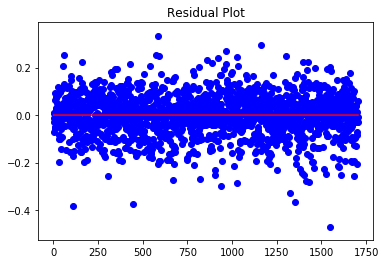

In [619]:
x = [i for i in range(1, len(Y_pred)+1)]

x_plot = plt.scatter(x, (Y_pred-Y_test), c='b')
plt.plot(x,[0]*len(Y_pred), c='r')

plt.title("Residual Plot")
plt.show()

### Regularization

In [620]:
predictors = X_train.columns
predictors

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Missing', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [621]:
coeff = pd.Series(model.coef_, predictors).sort_values()
coeff

Outlet_Size_Missing               -0.058671
Outlet_Size_Medium                -0.047267
Outlet_Size_Small                 -0.047102
Outlet_Location_Type_Tier 3       -0.020868
Item_Type_Dairy                   -0.007814
Item_Visibility                   -0.007401
Outlet_Location_Type_Tier 2       -0.006634
Item_Type_Soft Drinks             -0.005721
Item_Type_Household               -0.004759
Item_Type_Frozen Foods            -0.002916
Item_Type_Others                  -0.002667
Item_Type_Meat                    -0.002589
Item_Type_Hard Drinks             -0.001991
Item_Type_Breakfast               -0.001415
Item_Type_Breads                   0.000572
Item_Type_Health and Hygiene       0.000947
Item_Type_Snack Foods              0.001103
Item_Weight                        0.002173
Item_Type_Canned                   0.002586
Item_Type_Starchy Foods            0.002642
Item_Fat_Content_Regular           0.002823
Item_Type_Fruits and Vegetables    0.002871
Item_Type_Seafood               

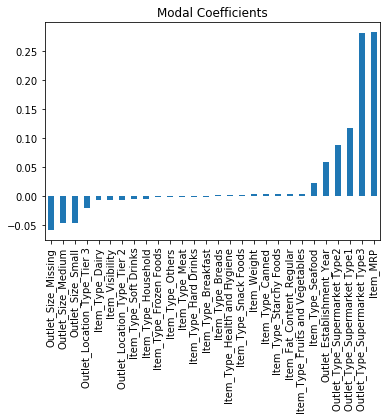

In [622]:
coeff.plot(kind='bar', title='Modal Coefficients')

### Let us further use Ridge Regression 

In [623]:
from sklearn.linear_model import Ridge

#### Alpha is the hyperparameter of ridge, which means they are not automatically learned by the model but we have to feed it explicilty

In [624]:
RidgeReg = Ridge(alpha=0.05, normalize=False)
RidgeReg.fit(X_train,Y_train)
pred1 = RidgeReg.predict(X_test)
RidgeReg.score(X_test,Y_test)

0.5587386779633431

In [625]:
RidgeReg.coef_

array([ 0.00217561, -0.00741987,  0.28187851,  0.05767248,  0.00282402,
        0.00056991, -0.00141531,  0.00258661, -0.00780767, -0.00290965,
        0.00287338, -0.00199168,  0.00095087, -0.00475484, -0.00258498,
       -0.0026659 ,  0.02131636,  0.00110663, -0.00571782,  0.00264712,
       -0.04618362, -0.05774883, -0.04614882, -0.00630983, -0.0202764 ,
        0.11756436,  0.08822053,  0.27953443])

In [626]:
RidgeReg.intercept_

-0.06032358661088991

#### Now for this Model, we are going to check the RMSE and R squared error

In [627]:
Y_pred_1 = RidgeReg.predict(X_test)

In [628]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_1 = np.sqrt(mean_squared_error(Y_pred_1,Y_test))
r2_1 = r2_score(Y_pred_1,Y_test)

print( " Value of rmse is", rmse_1)
print( " Value of r2_score is", r2_1)

 Value of rmse is 0.08761481784129554
 Value of r2_score is 0.2615202250266133


#### There is negligible amount of improvement in both RMSE and R squared error

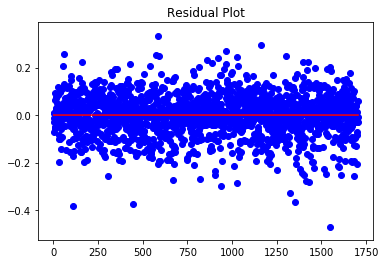

In [629]:
x = [i for i in range(1, len(Y_pred_1)+1)]

x_plot = plt.scatter(x, (Y_pred_1-Y_test), c='b')
plt.plot(x,[0]*len(Y_pred_1), c='r')

plt.title("Residual Plot")
plt.show()

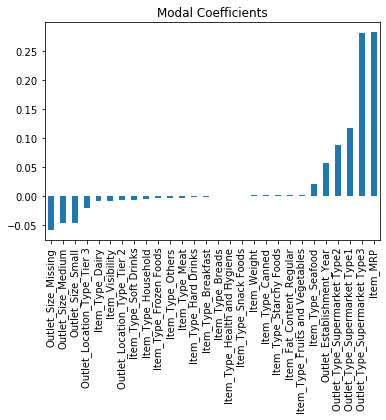

In [630]:
predictors = X_train.columns
coe = pd.Series(RidgeReg.coef_, predictors).sort_values()
coe.plot(kind='bar', title='Modal Coefficients')

### Let us now try with Lasso Regression

In [631]:
from sklearn.linear_model import Lasso
LassoReg = Lasso(alpha=0.01, normalize=False)
LassoReg.fit(X_train,Y_train)
pred2 = LassoReg.predict(X_test)
LassoReg.score(X_test,Y_test)

0.27874328310607166

In [632]:
Y_pred_2 = LassoReg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse_2 = np.sqrt(mean_squared_error(Y_pred_2,Y_test))
r2_2 = r2_score(Y_pred_2,Y_test)

print( " Value of rmse is", rmse_2)
print( " Value of r2_score is", r2_2)

 Value of rmse is 0.11201458308438347
 Value of r2_score is -7.655096590423117


### We are getting high R-squared and high RMSE value which means the LassoRegression Model did not fit well for the data 

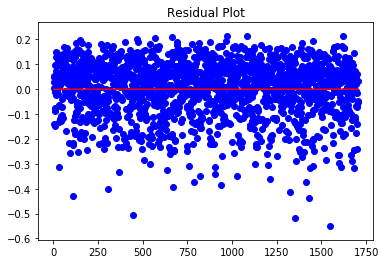

In [633]:
x = [i for i in range(1, len(Y_pred_2)+1)]

x_plot = plt.scatter(x, (Y_pred_2-Y_test), c='b')
plt.plot(x,[0]*len(Y_pred_2), c='r')

plt.title("Residual Plot")
plt.show()

In [634]:
df1 = pd.DataFrame(columns = ['Linear Reg', 'Ridge Reg', 'Lasso Reg'])

for i in range(len(RidgeReg.coef_)):
    df1 = df1.append({'Linear Reg':model.coef_[i], 'Ridge Reg':RidgeReg.coef_[i], 'Lasso Reg':LassoReg.coef_[i]}, ignore_index=True)

In [635]:
df1

,Linear Reg,Ridge Reg,Lasso Reg
0,0.002173,0.002176,0.000000
1,-0.007401,-0.007420,-0.000000
2,0.281908,0.281879,0.136645
3,0.058580,0.057672,-0.000000
4,0.002823,0.002824,0.000000
5,0.000572,0.000570,0.000000
6,-0.001415,-0.001415,-0.000000
7,0.002586,0.002587,0.000000
8,-0.007814,-0.007808,-0.000000
9,-0.002916,-0.002910,-0.000000


### Now let us try to make real world predictions 

In [636]:
df2 = pd.read_csv('C:/Users/Daksha/OneDrive/Desktop/Test.csv')

In [637]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [638]:
df2 = df2.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

### Data Preprocessing as done on Train.csv

In [639]:
mean = df2['Item_Weight'].mean()
df2['Item_Weight'] = df2['Item_Weight'].fillna(mean)

In [640]:
df2['Item_Fat_Content'].replace({ "LF":"Low Fat" , "reg":"Regular", "low fat" : "Low Fat"} , inplace=True)

In [641]:
def impute_nan(df2,variable):
    df2[variable] = np.where(df2[variable].isnull(),"Missing", df2[variable])

In [642]:
for feature in ['Outlet_Size']:
    impute_nan(df2, feature)

In [643]:
df2 = pd.get_dummies(df2, columns=None, drop_first=True)

### Let us see our new and improved dataset

In [644]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903,0.354339,0.029044,0.013378,0.076571,0.079916,0.100334,...,0.049463,0.021299,0.327759,0.282697,0.280232,0.326703,0.393065,0.654286,0.108784,0.109840
std,4.245189,0.051252,61.809091,8.372256,0.478355,0.167945,0.114897,0.265933,0.271186,0.300472,...,0.216852,0.144392,0.469438,0.450350,0.449152,0.469049,0.488474,0.475642,0.311395,0.312718
min,4.555000,0.000000,31.990000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.195000,0.027047,94.412000,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.695633,0.054154,141.415400,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.850000,0.093463,186.026600,2004.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,21.350000,0.323637,266.588400,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Now let us normalize this data

In [645]:
scale_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df2[scale_columns] = scaler.fit_transform(df2[scale_columns])

### Now Let us predict the value of sales using our Ridge Regression model

In [646]:
Prediction = RidgeReg.predict(df2)
Prediction

array([0.13889372, 0.10714978, 0.14128169, ..., 0.138242  , 0.27228983,
       0.09512443])

### It has successfully predicted the Sales value of the item from the data present in Test.csv



#### This was a really good experience, The dataset was merely good with less columns having null values

#### We could handle all missing values properly

#### We had to do one hot encoding for categorial data and normalisation for numeric data

#### Almost all features were really important for our predictions